# Tori Lowery's Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None, "display.max_rows", None)

# Read in csv
houses = pd.read_csv("../data/train.csv", index_col = "Id")

# Adjust MSSubClass to string
houses["MSSubClass"] = houses["MSSubClass"].astype('str')

# Convert Alley to Factor
houses["Alley"] = houses["Alley"].map(lambda x: 1 if x is True else 0)

# Bin LotConfig to impute missing LotFrontage
mean_frontage = dict(houses.groupby("LotConfig")["LotFrontage"].mean())
mean_frontage
houses.loc[pd.isna(houses["LotFrontage"]), "LotFrontage"] = houses.loc[pd.isna(houses["LotFrontage"]), "LotConfig"].replace(mean_frontage)
houses = houses.drop("LotConfig", axis = 1)

# Convert Fireplace Quality to Scale
houses["FireplaceQu"] = houses["FireplaceQu"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)

# Convert Exterior Quality and Condition to Scale
houses["ExterQual"] = houses["ExterQual"].apply(lambda x: 0 if x == "Po" else 1 if x == "Fa" else 2 if x == "TA" else 3 if x == "Gd" else 5)
houses["ExterCond"] = houses["ExterCond"].apply(lambda x: 0 if x == "Po" else 1 if x == "Fa" else 2 if x == "TA" else 3 if x == "Gd" else 5)

# Convert Basement Quality and Condition to Scale
houses["BsmtQual"] = houses["BsmtQual"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["BsmtCond"] = houses["BsmtCond"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["BsmtExposure"] = houses["BsmtExposure"].apply(lambda x: 0 if x == False else 1 if x == "No" else 2 if x == "Mn" else 3 if x == "Av" else 4)
houses["BsmtFinType1"] = houses["BsmtFinType1"].apply(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "LwQ" else 3 if x == "Rec" else 4 if x == "BLQ" else 5 if x == "ALQ" else 6)
houses["BsmtFinType2"] = houses["BsmtFinType2"].apply(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "LwQ" else 3 if x == "Rec" else 4 if x == "BLQ" else 5 if x == "ALQ" else 6)

# Convert Heating, Kitchen, and Garage Quality and Finish to Scale
houses["HeatingQC"] = houses["HeatingQC"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["KitchenQual"] = houses["KitchenQual"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["GarageQual"] = houses["GarageQual"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["GarageFinish"] = houses["GarageFinish"].apply(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "RFn" else 3)

# Feature Engineer total Porch/Deck Area
houses["TotalPorchSqft"] = houses["WoodDeckSF"] + houses["OpenPorchSF"] + houses["EnclosedPorch"] + houses["3SsnPorch"] + houses["ScreenPorch"]

# Drop Rows with NA (9 total) from Electrical, MasVnrType, and MasVnrArea
houses = houses[~pd.isna(houses["Electrical"])]
houses = houses[~pd.isna(houses["MasVnrType"])]

# Drop Columns
houses = houses.drop(["MiscFeature", "Fence", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", 
                      "PoolArea", "PoolQC", "GarageCond", 
                      "GarageCars", "BsmtFinSF1", "BsmtFinSF2"], axis=1)

# Transform Sale Price with Log()

houses.dtypes
# dict(houses.isna().sum())
# houses.head(10)
# houses.shape

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,PavedDrive,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalPorchSqft
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.000000,8450,Pave,0,Reg,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,1,150,856,GasA,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,5,Attchd,2003.0,2,548,3,Y,0,2,2008,WD,Normal,208500,61
2,20,RL,80.000000,9600,Pave,0,Reg,Lvl,AllPub,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4,3,4,5,1,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,2,460,3,Y,0,5,2007,WD,Normal,181500,298
3,60,RL,68.000000,11250,Pave,0,IR1,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,4,3,2,6,1,434,920,GasA,5,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,2001.0,2,608,3,Y,0,9,2008,WD,Normal,223500,42
4,70,RL,60.000000,9550,Pave,0,IR1,Lvl,AllPub,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2,2,BrkTil,3,4,1,5,1,540,756,GasA,4,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,1998.0,1,642,3,Y,0,2,2006,WD,Abnorml,140000,307
5,60,RL,84.000000,14260,Pave,0,IR1,Lvl,AllPub,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,4,3,3,6,1,490,1145,GasA,5,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,2000.0,2,836,3,Y,0,12,2008,WD,Normal,250000,276
6,50,RL,85.000000,14115,Pave,0,IR1,Lvl,AllPub,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,Wood,4,3,1,6,1,64,796,GasA,5,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,3,5,Typ,0,5,Attchd,1993.0,1,480,3,Y,700,10,2009,WD,Normal,143000,390
7,20,RL,75.000000,10084,Pave,0,Reg,Lvl,AllPub,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,3,2,PConc,5,3,3,6,1,317,1686,GasA,5,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,4,7,Typ,1,4,Attchd,2004.0,2,636,3,Y,0,8,2007,WD,Normal,307000,312
8,60,RL,84.039801,10382,Pave,0,IR1,Lvl,AllPub,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,2,2,CBlock,4,3,2,5,4,216,1107,GasA,5,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,3,7,Typ,2,3,Attchd,1973.0,2,484,3,Y,350,11,2009,WD,Normal,200000,667
9,50,RM,51.000000,6120,Pave,0,Reg,Lvl,AllPub,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,2,2,BrkTil,3,3,1,1,1,952,952,GasA,4,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,3,8,Min1,2,3,Detchd,1931.0,1,468,2,Y,0,4,2008,WD,Abnorml,129900,295


In [ ]:
plt.hist(houses.SalePrice)

In [ ]:
plt.hist(log(houses.SalePrice))

## Random Forest Findings:
When the randomforest uses all columns, train score is .9784431341050297 and test score is 0.9109712507382508.

So far the best model results have been using this subset of columns:
        
        ["MSSubClass", "MSZoning", "LotFrontage", "Alley", "Utilities", "Neighborhood", "Condition1", "BldgType",
        "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "Exterior1st", "ExterCond", "BsmtExposure",
        "TotalBsmtSF", "Heating", "CentralAir", "1stFlrSF", "2ndFlrSF", "Fireplaces", "FireplaceQu", 
        "KitchenAbvGr", "KitchenQual", "GarageType", "GarageArea", "GarageQual", "SaleType", 
        "SaleCondition", "TotalPorchSqft"]
        
        with params = n_estimators=800, max_features=25
        
        train score is 0.9789596719933514
        test score is 0.904114151711287
        

In [225]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
randomForest = ensemble.RandomForestRegressor()

In [244]:
use_columns = ["MSSubClass", "MSZoning", "LotFrontage", "Alley", "Utilities", "Neighborhood", "Condition1", "BldgType",
              "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "Exterior1st", "ExterCond", "BsmtExposure", "TotalBsmtSF", "Heating", "HeatingQC", "CentralAir",
               "1stFlrSF", "2ndFlrSF", "Fireplaces", "KitchenAbvGr", "KitchenQual", "FireplaceQu", "GarageType", "GarageArea", "GarageQual", "SaleType", "SaleCondition", "TotalPorchSqft"]
X = pd.get_dummies(houses[use_columns], drop_first=True, dummy_na=True)
y = houses['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [245]:
randomForest.set_params(random_state=42, n_estimators=800, max_features=25, oob_score=True)
randomForest.fit(X_train, y_train) # fit 
randomForest.score(X_train, y_train) # accuracy 

0.9789596719933514

In [246]:
randomForest.score(X_test, y_test) 

0.904114151711287

In [247]:
randomForest.oob_score_ 

0.8434311555574577

In [248]:
feature_importance = list(zip(X_train.columns, randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
# pd.DataFrame({'name':name,'score':score})[:15].plot.bar(x='name', y='score')

In [250]:
from sklearn.model_selection import GridSearchCV
grid_para_forest = {
    "n_estimators": [250, 500, 800, 1000],
#     "min_samples_leaf": range(1, 10),
    "max_features": np.linspace(start=2, stop=30, num=15, dtype=int),
    "random_state": [42]}
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring='r2', cv=5)
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features=25,
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=800, n_jobs=None,
                                             oob_score=True, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None

In [243]:
grid_search_forest.best_score_

0.8269834353379526

In [251]:
grid_search_forest.best_params_

{'max_features': 26, 'n_estimators': 1000, 'random_state': 42}

## Examine Effects of Different Number of Trees

In [ ]:
n_trees_range = range(10, 1000, 100)  # OOB score will warning if too few trees
train_error2 = []
test_error2 = []
oob_error = []

for n_trees in n_trees_range:
#     for n_feat in n_feat_range:
    randomForest.set_params(n_estimators=n_trees, random_state=42, oob_score=True)
    randomForest.fit(X_train, y_train)
    train_error2.append(1 - randomForest.score(X_train, y_train))
    test_error2.append(1 - randomForest.score(X_test, y_test))
    oob_error.append(1 - randomForest.oob_score_)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(n_trees_range, train_error2, c='red', label='training error')
plt.plot(n_trees_range, test_error2, c='blue', label='test error')
plt.plot(n_trees_range, oob_error, c='pink', label='oob error')
plt.ylabel('Error')
plt.xlabel('Number of trees')
plt.legend()
plt.show()

# Multiple Linear Regression

In [4]:
from sklearn import linear_model
from sklearn.metrics import r2_score
ols = linear_model.LinearRegression()

In [17]:
X2 = pd.get_dummies(houses.drop(["GarageYrBlt", "SalePrice"], axis=1), drop_first=True, dummy_na=True)
y2 = houses['SalePrice']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [18]:
ols.fit(X2_train, y2_train) # fit 
ols.score(X2_train, y2_train) # accuracy 

0.918996045912449

In [19]:
ols.score(X2_test, y2_test)

0.5643007810711271

## Regularization
### A. Ridge Exploration

In [172]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
ridge = Ridge()

In [173]:
ridge.set_params(alpha=0, normalize=False)
ridge.fit(X2_train, y2_train)
ridge.score(X2_train, y2_train)

0.72811767033926

In [174]:
ridge.score(X2_test, y2_test)

-6.849882742434171e+17

In [212]:
alphas = np.linspace(.00001, 5, 1000)
ridge.set_params(normalize=True)
coefs  = []
scores = []
test_scores = []
for alpha in alphas:
        ridge.set_params(alpha=alpha)
        ridge.fit(X2_train, y2_train)  
        coefs.append(ridge.coef_)
        scores.append(ridge.score(X2_train, y2_train))
        test_scores.append(ridge.score(X2_test, y2_test))
coefs = pd.DataFrame(coefs, index = alphas, columns = X2_train.columns)  
coefs.head()

,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,MiscVal,MoSold,YrSold,TotalPorchSqft,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_nan,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,Street_Pave,Street_nan,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,Utilities_NoSeWa,Utilities_nan,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,CentralAir_Y,CentralAir_nan,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Functional_nan,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,PavedDrive_P,PavedDrive_Y,PavedDrive_nan,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0.000010,54.737481,0.516137,0.0,6710.840309,5966.339006,288.118251,13.881541,29.026428,9998.802825,-5934.868764,4808.959730,-1248.816417,5064.943711,-170.657488,-2170.866768,-21.545911,42.180550,819.095453,14.273876,36.166018,17.098369,32.483855,114.311065,680.484789,2410.942910,1764.944471,-6366.767701,-10917.708811,4804.390968,3271.207760,5626.607083,2001.267424,-44.537000,25.378043,6914.570956,0.441105,

In [213]:
# sorted(coefs.iloc[0, :])
# coefs.iloc[0, :].sort_values()
# coefs.index

Text(0, 0.5, 'slope values')

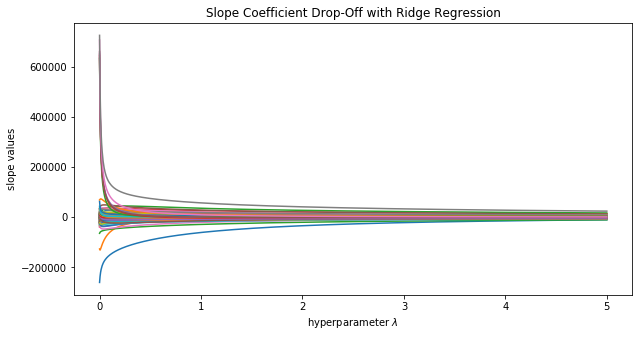

In [214]:
plt.rcParams['figure.figsize'] = (10,5)
for name in coefs.iloc[0, :].sort_values().index:
    plt.plot(coefs.index, coefs[name], label=name)
# plt.legend(loc=4)   
plt.title(r'Slope Coefficient Drop-Off with Ridge Regression')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

Text(0, 0.5, '$R^2$')

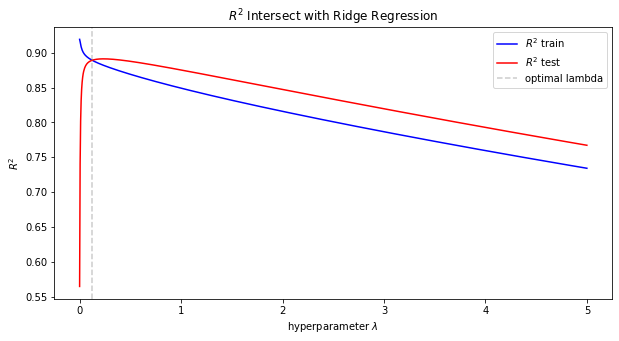

In [216]:
plt.plot(alphas, scores, c='b', label=r'$R^2$ train')
plt.plot(alphas, test_scores, c='r', label=r'$R^2$ test')
ridge_underfit = alphas[np.array(test_scores) > np.array(scores)]
last_underfit = np.min(ridge_overfit)
plt.axvline(last_underfit, linestyle='--', color='grey', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.title(r'$R^2$ Intersect with Ridge Regression')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [217]:
ridge.set_params(normalize=True, alpha=last_underfit)
ridge.fit(X2_train, y2_train)
ridge.score(X2_train, y2_train)

0.8889075690027756

In [218]:
ridge.score(X2_test, y2_test)

0.889088674606691

### B. Lasso Exploration
So far, train and test scores respectively are:
    
    0.8873280852256894
    0.8865658676533404

In [224]:
lasso = Lasso()

In [220]:
alphas = np.linspace(0.1,40.1,100)
lasso.set_params(normalize=True)
coefs_lasso  = []
scores_lasso = []
scores_test_lasso = []
for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(X2_train, y2_train)  
        coefs_lasso.append(lasso.coef_)
        scores_lasso.append(lasso.score(X2_train, y2_train))
        scores_test_lasso.append(lasso.score(X2_test, y2_test))
coefs = pd.DataFrame(coefs_lasso, index = alphas, columns = X2_train.columns)  
coefs.head()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4942031378.267517, tolerance: 749744684.4883518
  positive)


,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,MiscVal,MoSold,YrSold,TotalPorchSqft,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_nan,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,Street_Pave,Street_nan,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,Utilities_NoSeWa,Utilities_nan,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,CentralAir_Y,CentralAir_nan,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Functional_nan,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,PavedDrive_P,PavedDrive_Y,PavedDrive_nan,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0.100000,54.903692,0.516503,0.0,6727.206283,5950.090125,288.174494,14.028870,28.798343,9988.098173,-5876.915090,4818.844193,-1272.435513,5094.580416,-155.557844,-2146.557500,-21.465105,41.929083,819.312232,35.914871,57.576211,38.141461,10.859745,70.921292,551.918167,2392.395590,1730.031760,-6385.645853,-11119.985481,4793.080121,3301.704936,5652.999709,2007.285531,-6.827498,25.444993,6722.130283,0.414632,-6

Text(0, 0.5, 'slope values')

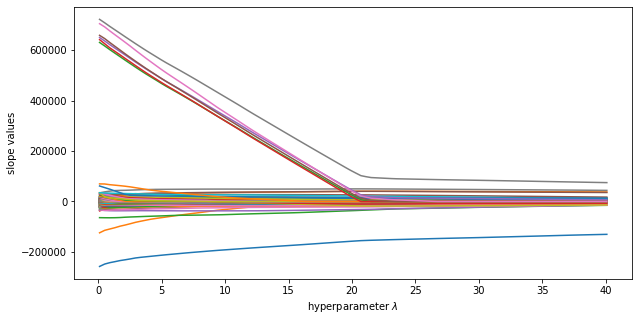

In [221]:
plt.rcParams['figure.figsize'] = (10,5)
for name in coefs.iloc[0, :].sort_values().index:
    plt.plot(coefs.index, coefs[name], label=name)
# plt.legend(loc=4)   
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

In [222]:
# coefs.iloc[20, (coefs.iloc[20, ] > 0).values]

Text(0, 0.5, '$R^2$')

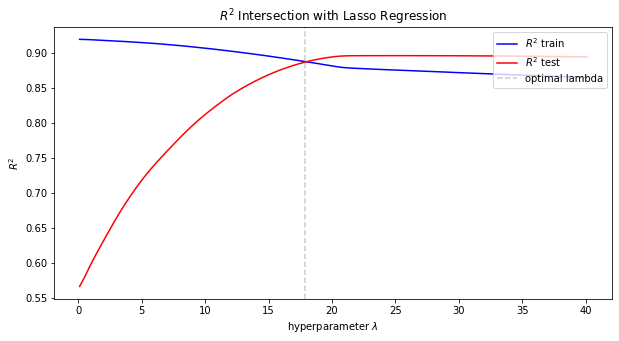

In [223]:
plt.plot(alphas, scores_lasso, c='b', label=r'$R^2$ train')
plt.plot(alphas, scores_test_lasso, c='r', label=r'$R^2$ test')
lasso_overfit = alphas[np.array(scores_test_lasso) < np.array(scores_lasso)]
last_overfit = max(lasso_overfit)
plt.axvline(last_overfit, linestyle='--', color='grey', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.title(r'$R^2$ Intersection with Lasso Regression')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [169]:
lasso.set_params(normalize=True, alpha=last_overfit)
lasso.fit(X2_train, y2_train)
lasso.score(X2_train, y2_train)

0.8873280852256894

In [170]:
lasso.score(X2_test, y2_test)

0.8865658676533404

## Observe P values and conf intervals for Features

In [98]:
import statsmodels.api as sm 
X_add_const = sm.add_constant(X2_train)
ols3 = sm.OLS(y2_train, X_add_const)
ans = ols3.fit()
# print(ans.summary())
ans.summary().tables[1]

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,coef,std err,t,P>|t|,[0.025,0.975]
const,-2.783e+06,1.27e+06,-2.188,0.029,-5.28e+06,-2.87e+05
LotFrontage,54.9306,50.219,1.094,0.274,-43.621,153.482
LotArea,0.5161,0.122,4.221,0.000,0.276,0.756
Alley,-0.0004,0.000,-2.187,0.029,-0.001,-3.98e-05
OverallQual,6708.6716,1241.684,5.403,0.000,4271.951,9145.393
OverallCond,5967.8077,1038.374,5.747,0.000,3930.068,8005.547
YearBuilt,288.2795,100.143,2.879,0.004,91.755,484.804
YearRemodAdd,13.9171,66.398,0.210,0.834,-116.385,144.219
MasVnrArea,29.0297,7.305,3.974,0.000,14.694,43.366
ExterQual,9999.6924,2049.888,4.878,0.000,5976.924,1.4e+04


## Comparing R^2 to All other Features

In [ ]:
cont_features = ['LotFrontage', 'LotArea', "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", 'MasVnrArea', 
                "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
                "BsmtUnfSF", "HeatingQC", 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', "BsmtFullBath", 
                'GrLivArea', "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "KitchenQual", 
                "TotRmsAbvGrd", "Fireplaces", "FireplaceQu", 'GarageArea', "GarageFinish", "GarageArea", "GarageQual",
                "MiscVal", "MoSold", "YrSold", 'TotalPorchSqft']
scores = {}
ols2 = linear_model.LinearRegression()
for feature_name in cont_features:
    df2 = houses.copy().drop("GarageYrBlt", axis=1)
    df2 = pd.get_dummies(df2, drop_first=True, dummy_na=True)
    feature = df2[feature_name].copy()
    df2.drop(feature_name, axis=1, inplace=True)
    ols2.fit(df2, feature)
    scores[feature_name] = ols2.score(df2, feature) 

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index().sort_values(["R2"]))
plt.title('$R^2$ of a continuous feature against the other features')
for item in ax.get_xticklabels(): item.set_rotation(90)

# Visualization of Data

### 1. 1st and 2nd Floor  and Basement SQFT against Price

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
houses.plot(ax=axes[0], kind='scatter', x='1stFlrSF', y='SalePrice',c='b', alpha=.2)
houses.plot(ax=axes[1], kind='scatter', x='2ndFlrSF', y='SalePrice',c='r', alpha=.2)
houses.plot(ax=axes[2], kind='scatter', x='TotalBsmtSF', y='SalePrice',c='g', alpha=.2)
plt.show()

### 2. Lot Frontage, Year Built, and Year Remodelled against Price

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
houses.plot(ax=axes[0], kind='scatter', x='LotFrontage', y='SalePrice',c='b',  alpha=.2)
houses.plot(ax=axes[1], kind='scatter', x='YearBuilt', y='SalePrice',c='r', alpha=.2)
houses.plot(ax=axes[2], kind='scatter', x='YearRemodAdd', y='SalePrice',c='g', alpha=.2)
plt.show()

### 3. Overall Quality against Price

In [ ]:
import seaborn as sns
g = sns.FacetGrid(data=houses, col="OverallQual", hue="OverallQual", palette="tab20c",
                     col_wrap=5, height=3)
g.map(plt.hist, "SalePrice")

In [ ]:
sns.violinplot(x="OverallQual", y="SalePrice", data=houses)

In [ ]:
sns.lmplot(y="SalePrice", x="OverallQual", hue="OverallQual",
               height=7, data=houses)

### 4. MS Zoning against Price

In [ ]:
sns.violinplot(x="MSZoning", y="SalePrice", data=houses, palette="Set3", scale="count", order=["C (all)", "RM", "RH", "RL", "FV"])

### 5. Total Porch and Deck SQFT (feature eng.) against Price

In [ ]:
houses.plot(kind='scatter', x='TotalPorchSqft', y='SalePrice',c='maroon', alpha=.2)
plt.show()

### 6. Year Built grouped by Exterior Quality against Price

In [ ]:
sns.lmplot(x="YearBuilt", y="SalePrice", hue="ExterQual",
               height=10, data=houses)

### 7. Overall Condition against Price

In [ ]:
sns.violinplot(x="OverallCond", y="SalePrice", data=houses, palette="Set3", scale= "count")

### 8. Above Ground Living Area SQFT grouped by Overall Quality against Price

In [ ]:
sns.lmplot(x="GrLivArea", y="SalePrice", hue="OverallQual",
               height=5, data=houses.loc[houses["OverallQual"] > 5])

In [ ]:
# sns.lmplot(x="YearBuilt", y="SalePrice", hue="OverallCond",
#                height=5, data=houses.loc[houses["OverallCond"] == 5])

In [ ]:
# houses[(houses['CentralAir'] == "N")][["SalePrice", "YearBuilt"]].plot.scatter(x="YearBuilt", y="SalePrice")
# houses[(houses['Alley'] == "Grvl")].plot.bar()#[["SalePrice", "YearBuilt"]].plot.scatter(x="YearBuilt", y="SalePrice")

In [ ]:
# houses['CentralAir'].hist()

In [ ]:
# houses.groupby(["BsmtFinType1", "MSSubClass"])[["MSSubClass"]].count().plot.bar(figsize = (15, 5))

In [ ]:
# houses[(houses["PoolArea"] != 0)]["SalePrice"]

In [ ]:
# houses["SalePrice"].mean()

In [ ]:
# gargqual = houses.replace(np.nan, "NA").groupby(["GarageQual"])["GarageQual"].count()
# gargfin = houses.replace(np.nan, "NA").groupby(["GarageFinish"])["GarageFinish"].count()
# plt.bar(x=gargqual.index, height=gargqual.values)

In [ ]:
# houses.groupby("MasVnrType")[["MasVnrType"]].count().plot.bar()
# houses["AvgMasArea"] = houses.cut("MasVnrArea", 20)
# houses[["MasVnrArea", "SalePrice"]].plot.scatter(x="MasVnrArea" , y="SalePrice" )

In [ ]:
# houses["YearBuilt"].sort_values(ascending=False)